In [1]:
import nltk

### 1. Preprocessing

In [2]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import gutenberg,stopwords
import string
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()
punctuations=set(string.punctuation)
stop_words=set(stopwords.words("english"))
processed_sentences=[]

text=gutenberg.raw("shakespeare-hamlet.txt")

sentences=sent_tokenize(text)
for sentence in sentences:
    words=word_tokenize(sentence)
    words=[w.lower() for w in words]
    words=[w for w in words if w not in punctuations]
    words=[w for w in words if w not in stop_words]
    words=[lemmatizer.lemmatize(w) for w in words]
    processed_sentences.append(words)
print("Original Sentence:\n", sentences[0])
print("Processed Tokens:\n", processed_sentences[0])
    

Original Sentence:
 [The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus.
Processed Tokens:
 ['tragedie', 'hamlet', 'william', 'shakespeare', '1599', 'actus', 'primus']


### 2. Frequency Analysis

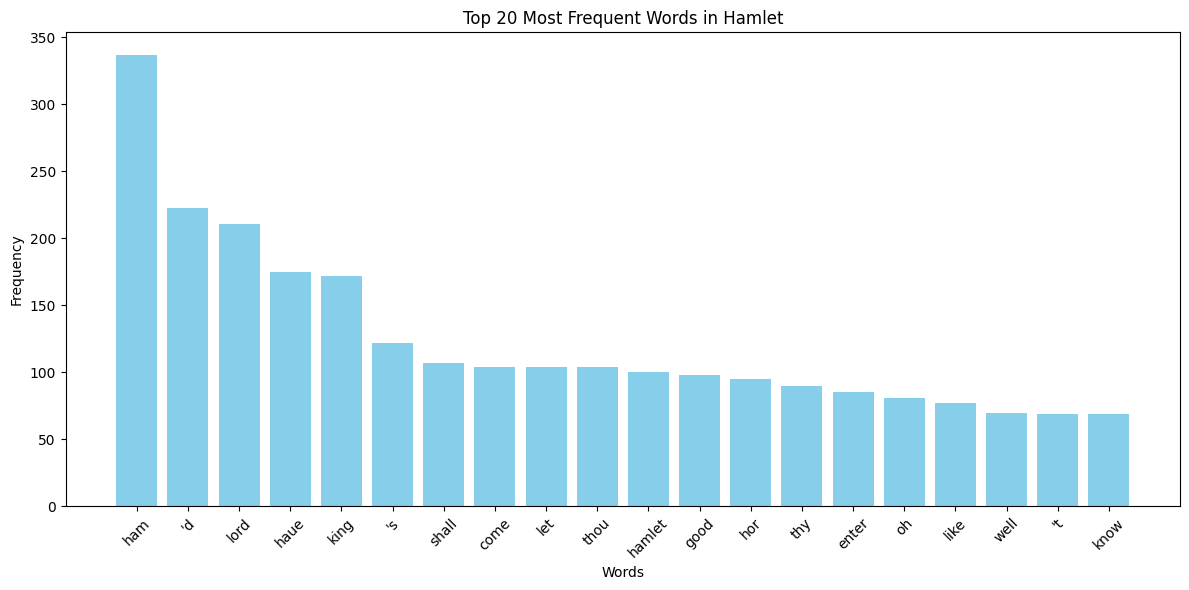

In [3]:
import matplotlib.pyplot as plt
words=word_tokenize(text)
word=[]
for i in words:
    word.append(i.lower())
    word=[w for w in word if w not in punctuations]
    word=[w for w in word if w not in stop_words]
word=nltk.FreqDist(word)
top_20 = word.most_common(20)

# Bar plot
plt.figure(figsize=(12, 6))
plt.bar([word for word, _ in top_20], [count for _, count in top_20], color='skyblue')
plt.title('Top 20 Most Frequent Words in Hamlet')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [4]:
tagged=nltk.pos_tag(word)
nouns = [word for word, tag in tagged if tag.startswith('NN')]
nouns=nltk.FreqDist(nouns)
print(nouns.most_common(20))

[('ham', 1), ('haue', 1), ('king', 1), ('let', 1), ('hor', 1), ('enter', 1), ('oh', 1), ('know', 1), ('sir', 1), ('qu', 1), ('vs', 1), ('laer', 1), ('giue', 1), ('thee', 1), ('ile', 1), ('speake', 1), ('vpon', 1), ('pol', 1), ('see', 1), ('man', 1)]


### 3. Named Entity Recognition

In [5]:
named_Ent=nltk.ne_chunk(tagged,binary=True)
entity_freq = nltk.FreqDist(named_Ent)
print(entity_freq.most_common(10))

[(('ham', 'NN'), 1), (("'d", 'MD'), 1), (('lord', 'VB'), 1), (('haue', 'NN'), 1), (('king', 'NN'), 1), (("'s", 'POS'), 1), (('shall', 'MD'), 1), (('come', 'VB'), 1), (('let', 'NN'), 1), (('thou', 'JJ'), 1)]


### 4. Sentiment Analysis

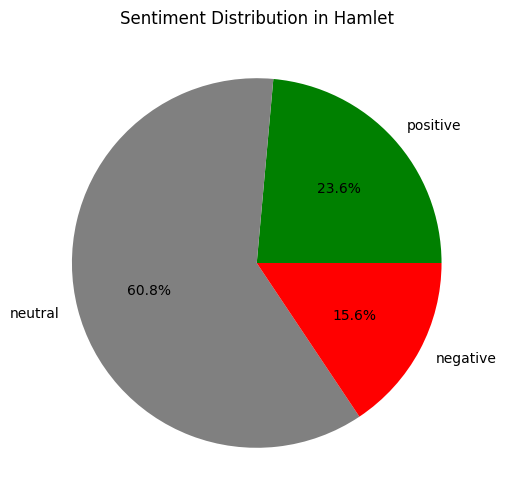

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiment_counts = {'positive': 0, 'neutral': 0, 'negative': 0}

for sent in sentences:
    score = sia.polarity_scores(sent)
    if score['compound'] >= 0.05:
        sentiment_counts['positive'] += 1
    elif score['compound'] <= -0.05:
        sentiment_counts['negative'] += 1
    else:
        sentiment_counts['neutral'] += 1

# print("Sentiment Summary:")
# for category, count in sentiment_counts.items():
#     print(f"{category.capitalize()}: {count}")

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts.values(),
    labels=sentiment_counts.keys(),
    autopct='%1.1f%%',
    colors=['green', 'grey', 'red']
)
plt.title('Sentiment Distribution in Hamlet')
plt.show()